<a href="https://colab.research.google.com/github/dasari2023/Code/blob/main/Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import image_data_format
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from keras.models import Sequential
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from keras.layers import Dense
from keras.layers import Conv2D, DepthwiseConv2D, SeparableConv2D
from keras.layers import AvgPool2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.constraints import maxnorm
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import copy
import random
import sys
import glob
import keras
import cv2
import csv
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
!pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0

In [ ]:
import tensorflow as tf
import glob
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import segmentation_models as sm

In [ ]:
import glob
import cv2
import os
images_t = glob.glob("/content/drive/MyDrive/Dataset/Segmentation/Training/*.jpg")
images_t.sort()
images_v = glob.glob("/content/drive/MyDrive/Dataset/Segmentation/Testing/*.jpg")
images_v.sort()
masks_t = glob.glob("/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/*.tif")
masks_t.sort()
masks_v = glob.glob("/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Testing Set/5. Optic Disc/*.tif")
masks_v.sort()
print(len(images_t))
print(len(images_v))
print(len(masks_t))
print(len(masks_v))

54
27
54
27


In [ ]:
for x in images_t:
    print(x)

/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_01.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_02.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_03.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_04.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_05.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_06.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_07.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_08.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_09.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_10.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_11.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_12.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_13.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_14.jpg
/content/drive/MyDrive/Dataset/Segmentation/Training/IDRiD_15.jpg
/content/d

In [ ]:
for x in masks_t:
    print(x)

/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_01_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_02_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_03_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_04_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_05_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_06_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_07_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Groundtruths/Training Set/5. Optic Disc/IDRiD_08_OD.tif
/content/drive/MyDrive/Dataset/Segmentation/All Segmentation Gro

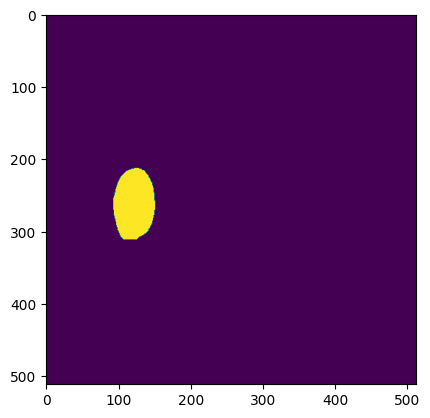

In [ ]:
import os
image_t=[]
image_v=[]
mask_t=[]
mask_v=[]
for x in images_t:
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(512,512))
  image_t.append(im)
for x in images_v:
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(512,512))
  image_v.append(im)
for y in masks_t:
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(512,512),interpolation = cv2.INTER_NEAREST)
  plt.imshow(ma)
  mask_t.append(ma)
for y in masks_v:
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(512,512),interpolation = cv2.INTER_NEAREST)
  plt.imshow(ma)
  mask_v.append(ma)

In [ ]:
print(len(image_t),len(mask_t))
img_array_t=np.array(image_t)
mask_array_t=np.array(mask_t)
mask_array_t=np.expand_dims(mask_array_t,axis=-1)
img_array_v=np.array(image_v)
mask_array_v=np.array(mask_v)
mask_array_v=np.expand_dims(mask_array_v,axis=-1)
mask_array_t=mask_array_t.astype(np.float32)
mask_array_v=mask_array_v.astype(np.float32)
print(img_array_t.shape)
print(mask_array_t.shape)
print((np.unique(mask_array_t)))
print(mask_array_t.shape)

54 54
(54, 512, 512, 3)
(54, 512, 512, 1)
[ 0. 76.]
(54, 512, 512, 1)


In [ ]:
a=np.where(mask_array_t==76)
mask_array_t[a]=1
print(np.unique(mask_array_t))
b=np.where(mask_array_v==76)
mask_array_v[b]=1
print(np.unique(mask_array_v))

[0. 1.]
[0. 1.]


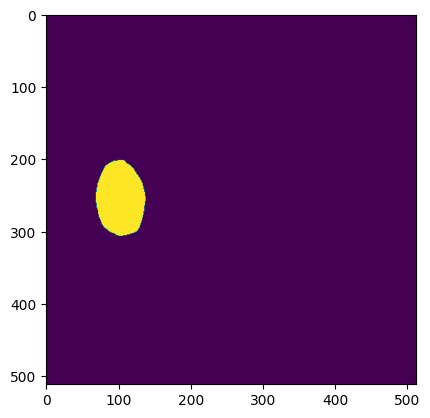

In [ ]:
plt.imshow(mask_array_t[20])

In [ ]:
x_train=list()
y_train=list()
#dgtest = glob.glob('/content/drive/MyDrive/Dataset/Disease Grading/Testing/*.jpg')
dgtrain =glob.glob('/content/drive/MyDrive/Dataset/Disease Grading/Training/*.jpg')
ltrain =glob.glob('/content/drive/MyDrive/Dataset/Localization/Training/*.jpg')
strain =glob.glob('/content/drive/MyDrive/Dataset/Segmentation/Training/*.jpg')
for i in dgtrain:
    img=cv2.imread(i,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_train.append(img)
    y_train.append(0)
for j in ltrain:
    img=cv2.imread(j,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_train.append(img)
    y_train.append(1)
for k in strain:
    img=cv2.imread(k,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_train.append(img)
    y_train.append(2)
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
y_train=to_categorical(y_train)
x_train.shape
y_train.shape

In [ ]:
x_test=list()
y_test=list()
dgtest = glob.glob('/content/drive/MyDrive/Dataset/Disease Grading/Testing/*.jpg')
#dgtest =glob.glob('/content/drive/MyDrive/Dataset/Disease Grading/Training/*.jpg')
ltest =glob.glob('/content/drive/MyDrive/Dataset/Localization/Testing/*.jpg')
stest =glob.glob('/content/drive/MyDrive/Dataset/Segmentation/Testing/*.jpg')
for i in dgtest:
    img=cv2.imread(i,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_test.append(img)
    y_test.append(0)
for j in ltest:
    img=cv2.imread(j,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_test.append(img)
    y_test.append(1)
for k in stest:
    img=cv2.imread(k,1)
    img=cv2.resize(img,(150,150))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(150, 150, 3)
    x_test.append(img)
    y_test.append(2)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
y_test=to_categorical(y_test)
x_test.shape
y_test.shape

In [ ]:
# Define the architecture of AlexNet
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np

np.random.seed(1000)

# Create a Sequential model
AlexNet = Sequential()

# Add the 1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(150,150,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Flatten the input
AlexNet.add(Flatten())

# Add the 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the 2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the Output layer
AlexNet.add(Dense(3))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))
AlexNet.summary()
# Print the model summary
# Compile the AlexNet model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
AlexNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
AlexNet.evaluate(x_test, y_test, verbose=1)
# Train the AlexNet model on the training data, for a total of 20 epochs, with validation data for monitoring performance
# X_train_gray_norm and y_train represent the preprocessed and normalized training data
# X_validation_gray_norm and y_validation represent the preprocessed and normalized validation data
history = AlexNet.fit(x_train, y_train, epochs=10)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 38, 38, 96)        34944     
                                                                 
 batch_normalization_56 (Bat  (None, 38, 38, 96)       384       
 chNormalization)                                                
                                                                 
 activation_56 (Activation)  (None, 38, 38, 96)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 19, 19, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 19, 19, 256)       614656    
                                                                 
 batch_normalization_57 (Bat  (None, 19, 19, 256)     

In [ ]:
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
!apt-get install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
pip install tensorflow==2.12.*

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import image_data_format
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, DepthwiseConv2D, SeparableConv2D
from keras.layers import AvgPool2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.constraints import maxnorm
import matplotlib.pyplot as plt
import numpy as np
import copy
import random
import sys
import csv

# client config
NUMOFCLIENTS = 5 # number of client(as particles)
SELECT_CLIENTS = 0.5 # c
EPOCHS = 10 # number of total iteration
CLIENT_EPOCHS = 5 # number of each client's iteration
BATCH_SIZE = 10 # Size of batches to train on
DROP_RATE = 0

# model config
LOSS = 'categorical_crossentropy' # Loss function
NUMOFCLASSES = 10 # Number of classes
lr = 0.0025
# OPTIMIZER = SGD(lr=0.015, decay=0.01, nesterov=False)
OPTIMIZER = legacy.SGD(lr=lr, momentum=0.9, decay=lr/(EPOCHS*CLIENT_EPOCHS), nesterov=False) # lr = 0.015, 67 ~ 69%

def write_csv(method_name, list):
    file_name = '{name}_CIFAR10_randomDrop_{drop}%_output_C_{c}_LR_{lr}_CLI_{cli}_CLI_EPOCHS_{cli_epoch}_TOTAL_EPOCHS_{epochs}_BATCH_{batch}.csv'
    file_name = file_name.format(folder="origin_drop",drop=DROP_RATE, name=method_name, c=SELECT_CLIENTS, lr=lr, cli=NUMOFCLIENTS, cli_epoch=CLIENT_EPOCHS, epochs=EPOCHS, batch=BATCH_SIZE)
    f = open(file_name, 'w', encoding='utf-8', newline='')
    wr = csv.writer(f)

    for l in list:
        wr.writerow(l)
    f.close()

def load_dataset():
    # Code for experimenting with CIFAR-10 datasets.
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

    # Code for experimenting with MNIST datasets.
    # (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    # X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    # X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)

    return (X_train, Y_train), (X_test, Y_test)

class Model():

    def __init__(self, loss, optimizer, classes=10):
        self.loss = loss
        self.optimizer = optimizer
        self.num_classes = classes

    def fl_paper_model(self, train_shape):
        model = Sequential()

        # 1
        model.add(Conv2D(filters=32,kernel_size=(5, 5),padding='same',activation='relu',input_shape=train_shape,kernel_regularizer='l2',))
        model.add(Conv2D(filters=32,kernel_size=(5, 5),padding='same',activation='relu',kernel_regularizer='l2',))
        model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
        model.add(Dropout(0.2))

        # 2
        model.add(Conv2D(filters=64,kernel_size=(5, 5),padding='same',activation='relu',kernel_regularizer='l2',))
        model.add(Conv2D(filters=64,kernel_size=(5, 5),padding='same',activation='relu',kernel_regularizer='l2',))
        model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
        model.add(Dropout(0.2))

        # 3
        model.add(Flatten())
        model.add(Dense(units=512,activation='relu',kernel_regularizer='l2',))
        model.add(Dropout(0.2))

        # 4
        model.add(Dense(units=self.num_classes,activation='softmax'))
        model.compile(loss=self.loss,optimizer=self.optimizer,metrics=['accuracy'])

        return model

def init_model(train_data_shape):
    model = Model(loss=LOSS, optimizer=OPTIMIZER, classes=NUMOFCLASSES)
    fl_model = model.fl_paper_model(train_shape=train_data_shape)

    return fl_model


def client_data_config(x_train, y_train):
    client_data = [() for _ in range(NUMOFCLIENTS)] # () for _ in range(NUMOFCLIENTS)
    num_of_each_dataset = int(x_train.shape[0] / NUMOFCLIENTS)

    for i in range(NUMOFCLIENTS):
        split_data_index = []
        while len(split_data_index) < num_of_each_dataset:
            item = random.choice(range(x_train.shape[0]))
            if item not in split_data_index:
                split_data_index.append(item)

        new_x_train = np.asarray([x_train[k] for k in split_data_index])
        new_y_train = np.asarray([y_train[k] for k in split_data_index])

        client_data[i] = (new_x_train, new_y_train)

    return client_data


def fedAVG(server_weight):
    avg_weight = np.array(server_weight[0])

    if len(server_weight) > 1:
        for i in range(1, len(server_weight)):
            avg_weight += server_weight[i]

    avg_weight = avg_weight / len(server_weight)

    return avg_weight


def client_update(index, client, now_epoch, avg_weight):
    print("client {}/{} fitting".format(index + 1, int(NUMOFCLIENTS * SELECT_CLIENTS)))

    if now_epoch != 0:
        client.set_weights(avg_weight)

    client.fit(client_data[index][0], client_data[index][1],
        epochs=CLIENT_EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_split=0.2,
    )

    return client


if __name__ == "__main__":
    (x_train, y_train), (x_test, y_test) = load_dataset()

    server_model = init_model(train_data_shape=x_train.shape[1:])
    server_model.summary()

    client_data = client_data_config(x_train, y_train)
    fl_model = []
    for i in range(NUMOFCLIENTS):
        fl_model.append(init_model(train_data_shape=client_data[i][0].shape[1:]))

    avg_weight = np.zeros_like(server_model.get_weights())
    server_evaluate_acc = []

    for epoch in range(EPOCHS):
        server_weight = []

        selected_num = int(max(NUMOFCLIENTS * SELECT_CLIENTS, 1))
        split_data_index = []
        while len(split_data_index) < selected_num:
            item = random.choice(range(len(fl_model)))
            if item not in split_data_index:
                split_data_index.append(item)
        split_data_index.sort()
        selected_model = [fl_model[k] for k in split_data_index]

        for index, client in enumerate(selected_model):
            recv_model = client_update(index, client, epoch, avg_weight)

            rand = random.randint(0,99)
            drop_communication = range(DROP_RATE)
            if rand not in drop_communication:
                server_weight.append(copy.deepcopy(recv_model.get_weights()))

        avg_weight = fedAVG(server_weight)

        server_model.set_weights(avg_weight)
        print("server {}/{} evaluate".format(epoch + 1, EPOCHS))
        server_evaluate_acc.append(server_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1))

    write_csv("FedAvg", server_evaluate_acc)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


170498071/170498071 [==============================] - 4s 0us/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 64)      

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


client 1/2 fitting
Epoch 1/5
800/800 [==============================] - 9s 8ms/step - loss: 9.4890 - accuracy: 0.2077 - val_loss: 6.9671 - val_accuracy: 0.2325
Epoch 2/5
800/800 [==============================] - 4s 5ms/step - loss: 5.3514 - accuracy: 0.2944 - val_loss: 4.2580 - val_accuracy: 0.2840
Epoch 3/5
800/800 [==============================] - 5s 7ms/step - loss: 3.4835 - accuracy: 0.3501 - val_loss: 2.9437 - val_accuracy: 0.3690
Epoch 4/5
800/800 [==============================] - 4s 6ms/step - loss: 2.5937 - accuracy: 0.3968 - val_loss: 2.3457 - val_accuracy: 0.3950
Epoch 5/5
800/800 [==============================] - 4s 5ms/step - loss: 2.1648 - accuracy: 0.4268 - val_loss: 2.0798 - val_accuracy: 0.4075
client 2/2 fitting
Epoch 1/5
800/800 [==============================] - 6s 7ms/step - loss: 9.9100 - accuracy: 0.2129 - val_loss: 7.4738 - val_accuracy: 0.2765
Epoch 2/5
800/800 [==============================] - 4s 5ms/step - loss: 6.0509 - accuracy: 0.2905 - val_loss: 4.863

<ipython-input-31-96f565aed8a3>:125: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  avg_weight = np.array(server_weight[0])
<ipython-input-31-96f565aed8a3>:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  avg_weight += server_weight[i]


1000/1000 [==============================] - 3s 3ms/step - loss: 2.5508 - accuracy: 0.1055
client 1/2 fitting
Epoch 1/5
800/800 [==============================] - 5s 6ms/step - loss: 1.9718 - accuracy: 0.3940 - val_loss: 1.8780 - val_accuracy: 0.4095
Epoch 2/5
800/800 [==============================] - 4s 5ms/step - loss: 1.8135 - accuracy: 0.4396 - val_loss: 1.8256 - val_accuracy: 0.4300
Epoch 3/5
800/800 [==============================] - 4s 5ms/step - loss: 1.7428 - accuracy: 0.4680 - val_loss: 1.7872 - val_accuracy: 0.4310
Epoch 4/5
800/800 [==============================] - 5s 6ms/step - loss: 1.6832 - accuracy: 0.4874 - val_loss: 1.7385 - val_accuracy: 0.4655
Epoch 5/5
800/800 [==============================] - 4s 5ms/step - loss: 1.6638 - accuracy: 0.5035 - val_loss: 1.7118 - val_accuracy: 0.4785
client 2/2 fitting
Epoch 1/5
800/800 [==============================] - 5s 5ms/step - loss: 1.9840 - accuracy: 0.3848 - val_loss: 1.7797 - val_accuracy: 0.4550
Epoch 2/5
800/800 [======